In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('clean_data.csv')

How many Project were successfully achieve their goals?

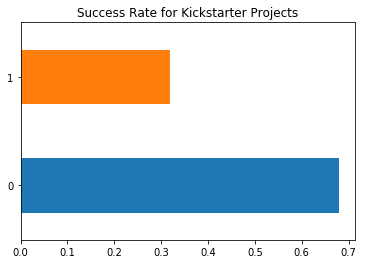

In [3]:
data.final_status.value_counts(normalize=True).plot(kind='barh',title='Success Rate for Kickstarter Projects')

How long was the deadline?

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


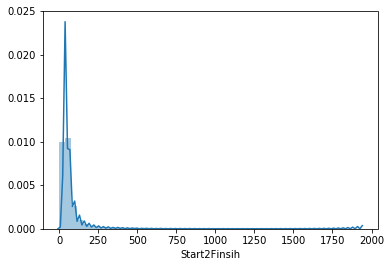

In [4]:
sns.distplot(data['Start2Finsih'])
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


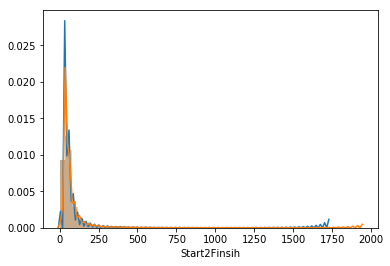

In [5]:
target_1 = data.loc[data['final_status'] == 1]
target_0 = data.loc[data['final_status'] == 0]

sns.distplot(target_0['Start2Finsih'])
sns.distplot(target_1['Start2Finsih'])
plt.show()

How many people backed the projects?

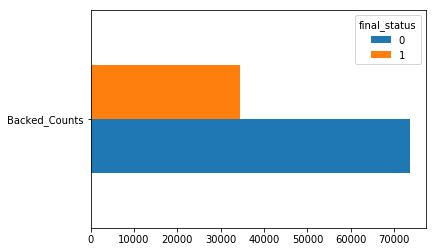

In [6]:
tab = pd.crosstab(data.backers_count.mean(),data.final_status)
tab = tab.reset_index()
tab = tab.rename({0:'Backed_Counts'})
tab[[0, 1]].plot(kind='barh')

What country most likely to back the project? 

In [7]:
pd.crosstab(train.country,train.final_status).plot(kind='barh', stacked=True,title='Country vs Success Rate')

NameError: name 'train' is not defined

US,GB and canada are most likely to back the Kickstarter Projects.

In [8]:
train = pd.read_csv('train.csv')
table = pd.pivot_table(train, values='goal', columns=['country'], aggfunc=np.mean)
table

country,AU,CA,DE,DK,GB,IE,NL,NO,NZ,SE,US
goal,105871.245745,64261.331638,3000.0,668239.94898,28504.852249,138483.945946,127313.721986,161681.307018,17433.157746,166659.4,32397.966017


In [9]:
train.goal.describe()

count    1.081290e+05
mean     3.672623e+04
std      9.719027e+05
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.300000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [10]:
def target(row):
    if row['goal'] <10000:
        return '0-9,999'
    elif row['goal'] >10000 and row['goal']<100000:
        return '10,000-99,000'
    elif row['goal'] >100000 and row['goal']<250000:
        return '100,000-249,999'
    elif row['goal'] >250000 and row['goal']<500000:
        return '250,000-499,999'
    elif row['goal'] >500000 and row['goal']<750000:
        return '500,000-750,000'
    elif row['goal'] >750000 and row['goal']<1000000:
        return '750,000-999,999'
    elif row['goal']>999999:
        return 'Over 1 Million'


In [11]:
data['Category_goal'] = data.apply(target,axis=1)

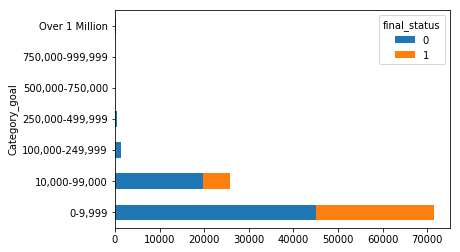

In [12]:
pd.crosstab(data.Category_goal , data.final_status).plot(kind='barh',stacked=True)
#pd.crosstab(data.Category_goal , data.backers_count).plot(kind='barh',stacked=True)

Project under $10,000 are not only more likely to be backed but also has higher chance of achieving their goal. 

In [13]:
data.backers_count.describe()

count    108129.000000
mean        123.516661
std        1176.745162
min           0.000000
25%           2.000000
50%          17.000000
75%          65.000000
max      219382.000000
Name: backers_count, dtype: float64

In [ ]:
def target(row):
    if row['backers_count'] <10:
        return '0-9,999'
    elif row['backers_count'] >10000 and row['goal']<50000:
        return '10,000-99,000'
    elif row['backers_count'] >100000 and row['goal']<250000:
        return '100,000-249,999'
    elif row['backers_count'] >250000 and row['goal']<500000:
        return '250,000-499,999'
    elif row['backers_count'] >500000 and row['goal']<750000:
        return '500,000-750,000'
    elif row['backers_count'] >750000 and row['goal']<1000000:
        return '750,000-999,999'
    elif row['backers_count']>999999:
        return 'Over 1 Million'